#### Use MNIST dataset. Create multi-layer neural network model using sklearn package. Tune the hyperparameters in order increase the accuracy of test data. Also check the overfitting of your model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

%matplotlib inline

In [2]:
X, y = load_digits(return_X_y = True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [4]:
(unique, counts) = np.unique(y_train, return_counts=True)
uniq = dict(zip(unique, counts))
uniq

{0: 142,
 1: 146,
 2: 142,
 3: 146,
 4: 145,
 5: 145,
 6: 145,
 7: 143,
 8: 139,
 9: 144}

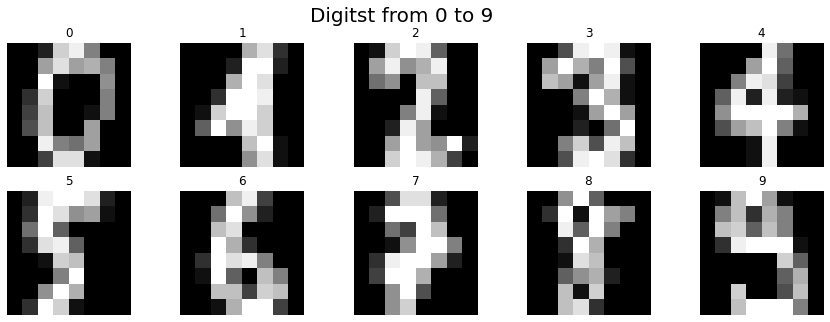

In [5]:
fig = plt.figure(figsize=(15,5))

for i in uniq.keys():
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[np.where(y_train==i)[0][42]].reshape(8,8), cmap='gray')
    plt.axis("off")
    plt.title(i)

plt.suptitle("Digitst from 0 to 9", fontsize=20)
plt.show()

In [6]:
mlp = MLPClassifier(random_state=42)

In [7]:
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [8]:
print("Baseline Scores")
print("Train :: ", round(accuracy_score(mlp.predict(X_train), y_train)*100, 2),
      "\nTest :: ", round(accuracy_score(mlp.predict(X_test), y_test)*100, 2))

Baseline Scores
Train ::  100.0 
Test ::  97.22


In [9]:
params = dict(hidden_layer_sizes=[(200,50), (300,), (350,)],
              alpha=[1e-04, 0.01])

skf = StratifiedKFold(n_splits=20, random_state=42, shuffle=True)

gscv_clf = GridSearchCV(mlp, params, cv=skf, scoring='accuracy', n_jobs=-1)

In [10]:
gscv_clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(200, 50), (300,), (350,)]},
             scoring='accuracy')

In [11]:
print('Score :: {1}\nEstimator :: {0}'.format(gscv_clf.best_estimator_ ,
                                              gscv_clf.best_score_))

Score :: 0.9833137715179971
Estimator :: MLPClassifier(alpha=0.01, hidden_layer_sizes=(350,), random_state=42)


In [12]:
y_pred_train = gscv_clf.predict(X_train)
y_pred_test = gscv_clf.predict(X_test)

In [13]:
print("Train :: ", round(accuracy_score(y_train, y_pred_train)*100, 2),
      "\nTest :: ", round(accuracy_score(y_test, y_pred_test)*100, 2))

Train ::  100.0 
Test ::  98.61


#### Reduction in error rate from 2.78% to 1.39%